#K-Nearest Neighbors (KNN) Algorithm Tutorial - Machine Learning Basics

* Tutorial: https://news.towardsai.net/knn
* Github: https://github.com/towardsai/tutorials/tree/master/k-nearest-neighbors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Import the iris dataset as provided by the sklearn Python module
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Converting sklearn data into Pandas dataframe
# target variables imply
# 0.0 - Setosa
# 1.0 - Versicolor
# 2.0 - Virginica
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

## Checking for outliers and imbalanced data

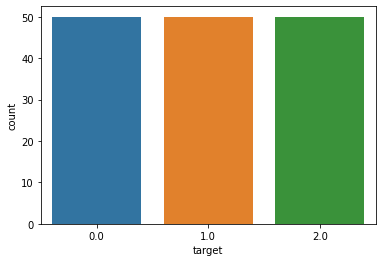

In [ ]:
# data is perfectly balanced
sns.countplot(x='target', data=iris)

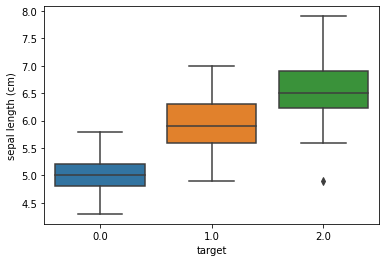

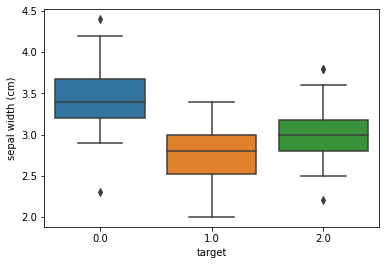

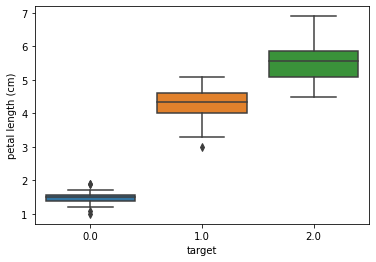

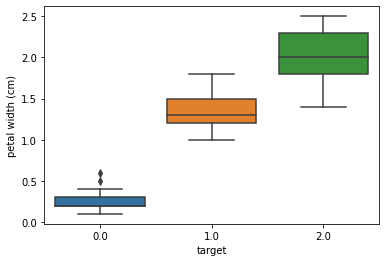

In [ ]:
# not much of outliers to br handled
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
  sns.boxplot(x='target', y=feature, data=iris)
  plt.show()

## Plotting a 2-D graph

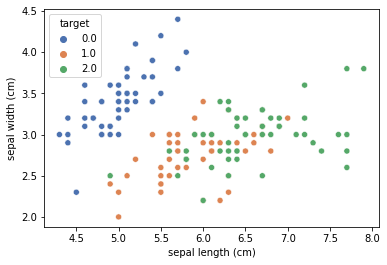

In [ ]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=iris, hue='target', palette="deep")

## Separating features and target

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.02-samples-features.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

In [ ]:
# X variable contains flower features
# Y variable contains target values
X = iris.drop(['target'], axis=1)
y = iris['target']

## Split the dataset into train and test sets

In [ ]:
# 60% of the data will be randomly selected at training data
# remaining 40% as testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

## Initial model

In [ ]:
# Initial model with nearest neighbor as 1(k-value)
# further, k will be replaced with optimal value
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9166666666666666


## Finding the right k-value

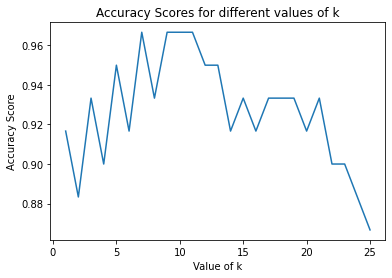

In [ ]:
# checking accuracy score for k-value rangin from 1 to 26
k_range = list(range(1,26))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-26
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

## Accuracy for optimal k-value

In [ ]:
# 11 is the optimal k-value for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9666666666666667


## Predicting class of new data

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)

# fitting the entire data without splitting
# into train and test
knn.fit(iris.drop(['target'], axis=1), iris['target'])

# new data to be classified
X_new = np.array([[1, 2.9, 10, 0.2]])
prediction = knn.predict(X_new)
print(prediction)

if prediction[0] == 0.0:
  print('Setosa')
elif prediction[0] == 1.0:
  print('Versicolor')
else:
  print('Virginica')

[2.]
Virginica
